# Detecting Clause End in Romanian

In [323]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [325]:
from os import system

from sklearn import tree
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.base import BaseEstimator, TransformerMixin

In [326]:
#this class is used to select different features for classification
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names, dtype=None):
        self.attribute_names = attribute_names
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_selected = X[self.attribute_names]
        if self.dtype:
            return X_selected.astype(self.dtype).values
        return X_selected.values

## Content
**1.Data Preparation**  
**2.Classifiers - Training part**  
    * Logistic Regression  
    * Support Vector Machines
    * Decision Tree
    * Ensemble Learning
    * Neural Network
**3.Classifiers - Test part**
    * Logistic Regression  
    * Support Vector Machines
    * Decision Tree
    * Ensemble Learning
    * Neural Network

## 1.Data preparation

In [327]:
#read the dataset from a csv file
end_df = pd.read_csv("train_set2.csv")

In [328]:
#visualize the training dataset
end_df

,Unnamed: 0,new_line,next_is_space,one_letter_before,abbreviation_before,suspension_point,number_point,class
0,0,n,y,n,n,n,n,y
1,1,y,n,n,n,n,n,y
2,2,n,y,n,n,n,n,y
3,3,y,n,n,n,n,n,y
4,4,n,y,n,n,n,n,y
5,5,y,n,n,n,n,n,y
6,6,y,n,n,n,n,n,y
7,7,n,y,n,y,n,n,n
8,8,y,n,n,n,n,n,y
9,9,y,n,n,n,n,n,y


In [329]:
end_df = end_df.drop(columns=['Unnamed: 0'])

In [330]:
#Let's transform these features from y and n to 0 and 1
end_df.columns

Index(['new_line', 'next_is_space', 'one_letter_before', 'abbreviation_before',
       'suspension_point', 'number_point', 'class'],
      dtype='object')

In [331]:
end_df.dtypes

new_line               object
next_is_space          object
one_letter_before      object
abbreviation_before    object
suspension_point       object
number_point           object
class                  object
dtype: object

In [332]:
end_df["new_line"] = end_df["new_line"] == 'y'
end_df["new_line"] = end_df["new_line"].astype(int)

end_df["next_is_space"] = end_df["next_is_space"] == 'y'
end_df["next_is_space"] = end_df["next_is_space"].astype(int)

end_df["one_letter_before"] = end_df["one_letter_before"] == 'y'
end_df["one_letter_before"] = end_df["one_letter_before"].astype(int)

end_df["abbreviation_before"] = end_df["abbreviation_before"] == 'y'
end_df["abbreviation_before"] = end_df["abbreviation_before"].astype(int)

end_df["suspension_point"] = end_df["suspension_point"] == 'y'
end_df["suspension_point"] = end_df["suspension_point"].astype(int)

end_df["number_point"] = end_df["number_point"] == 'y'
end_df["number_point"] = end_df["number_point"].astype(int)

end_df["class"] = end_df["class"] == 'y'
end_df["class"] = end_df["class"].astype(int)

In [333]:
end_df

,new_line,next_is_space,one_letter_before,abbreviation_before,suspension_point,number_point,class
0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1
3,1,0,0,0,0,0,1
4,0,1,0,0,0,0,1
5,1,0,0,0,0,0,1
6,1,0,0,0,0,0,1
7,0,1,0,1,0,0,0
8,1,0,0,0,0,0,1
9,1,0,0,0,0,0,1


In [334]:
(end_df["class"]==1).sum()

187

In [335]:
line = end_df["new_line"]
space = end_df["next_is_space"]

y = end_df["class"]

(0, 1)

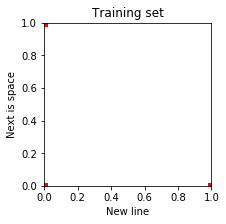

In [336]:
# Plot the data
fig = plt.figure(figsize=(3,3))
plt.title("Training set")
plt.scatter(line[y==0], space[y==0], color = "green", marker="s")
plt.scatter(line[y==1], space[y==1], color = "red", marker="o")
plt.xlabel("New line")
plt.xlim(0, 1)
plt.ylabel("Next is space")
plt.ylim(0, 1)

In [337]:
#Shuffle the data
end_df = end_df.take(np.random.permutation(len(end_df)))
end_df.reset_index(inplace=True, drop=True)
end_df

,new_line,next_is_space,one_letter_before,abbreviation_before,suspension_point,number_point,class
0,1,0,0,0,1,0,0
1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1
3,0,1,0,0,0,0,1
4,1,0,0,0,0,0,1
5,0,1,0,1,0,0,0
6,1,0,0,0,0,0,1
7,0,1,0,0,0,0,1
8,1,0,0,0,0,0,1
9,1,0,0,0,0,0,1


In [338]:
y = end_df["class"].values
y

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [339]:
end_df = end_df.drop(columns=["class"])

In [340]:
end_df

,new_line,next_is_space,one_letter_before,abbreviation_before,suspension_point,number_point
0,1,0,0,0,1,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
5,0,1,0,1,0,0
6,1,0,0,0,0,0
7,0,1,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


## Classifiers

## Training

### Logistic Regression

In [341]:
features = ["new_line", "next_is_space", "one_letter_before", "abbreviation_before", "suspension_point","number_point"]

In [342]:
df_pipeline_logistic = Pipeline([
        ("selector", DataFrameSelector(features)),
        ("estimator", LogisticRegression())
    ])

In [343]:
np.mean(cross_val_score(df_pipeline_logistic, end_df, y, scoring="precision", cv=10))

0.9724165806673547

### Support Vector Machines

In [344]:
df_pipeline_SVC = Pipeline([
    ("selector", DataFrameSelector(features)),
    ("estimator", SVC())
])

In [345]:
param_grid = [
  {'estimator__C': [0.001,0.01,0.1, 1, 10, 100, 1000], 'estimator__kernel': ['linear'],\
   'estimator__class_weight': ['balanced', None]},
  {'estimator__C': [0.001,0.01,1, 10, 100, 1000], 'estimator__gamma': [0.0001,0.001, 0.01,1,10], 'estimator__kernel': ['rbf'], \
   'estimator__class_weight': ['balanced', None]},
 ]

In [346]:
gs_SVC = GridSearchCV(df_pipeline_SVC, param_grid, scoring="precision", cv=10)

In [347]:
gs_SVC.fit(end_df, y)

/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.

/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.

/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.

/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.

/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['new_line', 'next_is_space', 'one_letter_before', 'abbreviation_before', 'suspension_point', 'number_point'],
         dtype=None)), ('estimator', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'estimator__class_weight': ['balanced', None], 'estimator__kernel': ['linear']}, {'estimator__C': [0.001, 0.01, 1, 10, 100, 1000], 'estimator__class_weight': ['balanced', None], 'estimator__kernel': ['rbf'], 'estimator__gamma': [0.0001, 0.001, 0.01, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose

In [348]:
gs_SVC.best_params_

{'estimator__C': 0.01,
 'estimator__class_weight': 'balanced',
 'estimator__gamma': 1,
 'estimator__kernel': 'rbf'}

In [349]:
gs_SVC.best_score_

1.0

In [350]:
gs_SVC.grid_scores_

/home/ldp/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.09319, std: 0.28333, params: {'estimator__C': 0.001, 'estimator__class_weight': 'balanced', 'estimator__kernel': 'linear'},
 mean: 0.09319, std: 0.28333, params: {'estimator__C': 0.001, 'estimator__class_weight': None, 'estimator__kernel': 'linear'},
 mean: 0.99452, std: 0.01667, params: {'estimator__C': 0.01, 'estimator__class_weight': 'balanced', 'estimator__kernel': 'linear'},
 mean: 0.99452, std: 0.01667, params: {'estimator__C': 0.01, 'estimator__class_weight': None, 'estimator__kernel': 'linear'},
 mean: 0.93711, std: 0.07332, params: {'estimator__C': 0.1, 'estimator__class_weight': 'balanced', 'estimator__kernel': 'linear'},
 mean: 0.95052, std: 0.04456, params: {'estimator__C': 0.1, 'estimator__class_weight': None, 'estimator__kernel': 'linear'},
 mean: 0.96368, std: 0.03965, params: {'estimator__C': 1, 'estimator__class_weight': 'balanced', 'estimator__kernel': 'linear'},
 mean: 0.96839, std: 0.03353, params: {'estimator__C': 1, 'estimator__class_weight': None, 'estim

In [351]:
model_SVC = gs_SVC.best_estimator_

***Trying LinearSVC class from sklearn.***

In [352]:
df_pipeline_LinearSVC = Pipeline([
    ("selector", DataFrameSelector(features)),
    ("estimator", LinearSVC())
])

In [353]:
param_grid = [
  {'estimator__C': [0.001,0.01,0.1, 1, 10, 100, 1000,10000], 'estimator__class_weight' : ['balanced',None],\
   'estimator__loss' : ['hinge','squared_hinge']}
 ]

In [354]:
gs_lsvc = GridSearchCV(df_pipeline_LinearSVC, param_grid, scoring="precision", cv=10)  

In [355]:
gs_lsvc.fit(end_df, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['new_line', 'next_is_space', 'one_letter_before', 'abbreviation_before', 'suspension_point', 'number_point'],
         dtype=None)), ('estimator', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'estimator__class_weight': ['balanced', None], 'estimator__loss': ['hinge', 'squared_hinge']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [356]:
gs_lsvc.best_params_

{'estimator__C': 1000,
 'estimator__class_weight': None,
 'estimator__loss': 'hinge'}

In [357]:
gs_lsvc.best_score_

0.9729429193899782

### Decision Tree

In [358]:
df_pipeline_DT = Pipeline([
    ("selector", DataFrameSelector(features)),
    ("estimator", DecisionTreeClassifier())
])

In [359]:
param_grid = [
    {"estimator__max_depth": [2,3,4,5,6], "estimator__criterion": ['gini', 'entropy'] }
]

In [360]:
gs_DT = GridSearchCV(df_pipeline_DT, param_grid, scoring="precision", cv=10)

In [361]:
gs_DT.fit(end_df, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['new_line', 'next_is_space', 'one_letter_before', 'abbreviation_before', 'suspension_point', 'number_point'],
         dtype=None)), ('estimator', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_featur...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'estimator__max_depth': [2, 3, 4, 5, 6], 'estimator__criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [362]:
gs_DT.best_params_

{'estimator__criterion': 'gini', 'estimator__max_depth': 5}

In [363]:
gs_DT.best_score_

0.97965291005291

In [364]:
model_DT = gs_DT.best_estimator_

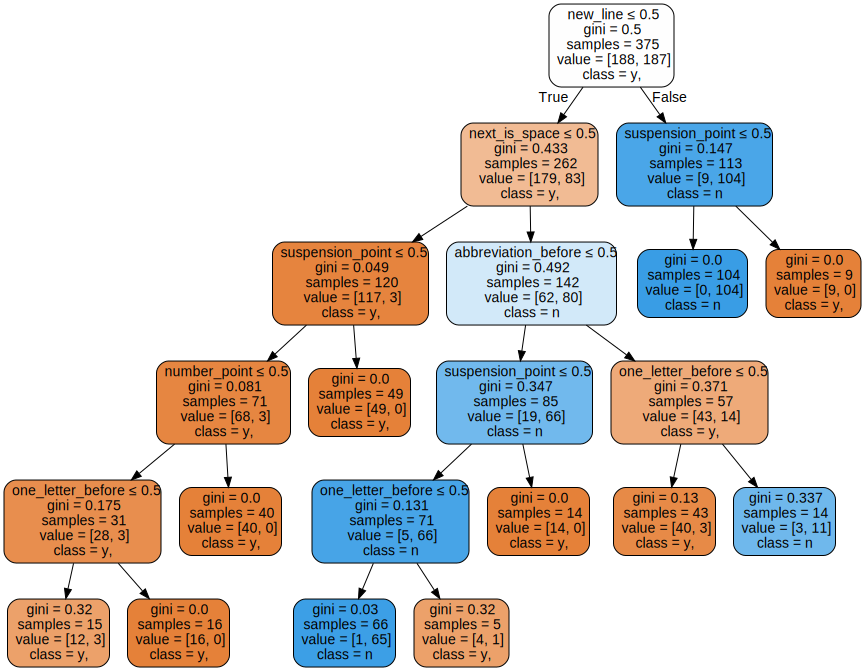

In [365]:
#model_DT = df_pipeline_DT.fit(end_df, y)
dot_data = tree.export_graphviz(model_DT.named_steps["estimator"], out_file=None, 
                         feature_names=features,  
                         class_names=["y,","n"],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Ensemble Learning

In [366]:
df_pipeline_RF = Pipeline([
    ("selector", DataFrameSelector(features)),
    ("estimator", RandomForestClassifier())
])

In [367]:
param_grid = {"estimator__n_estimators" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], "estimator__max_depth" : [2, 3, 4, 5],"estimator__criterion" : ['entropy','gini']}

In [368]:
gs_RF = GridSearchCV(df_pipeline_RF, param_grid, scoring="precision", cv=10)

In [369]:
gs_RF.fit(end_df, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['new_line', 'next_is_space', 'one_letter_before', 'abbreviation_before', 'suspension_point', 'number_point'],
         dtype=None)), ('estimator', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__max_depth': [2, 3, 4, 5], 'estimator__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'estimator__criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [370]:
gs_RF.best_params_

{'estimator__criterion': 'entropy',
 'estimator__max_depth': 5,
 'estimator__n_estimators': 30}

In [371]:
gs_RF.best_score_

0.97965291005291

### Neural Network

In [372]:
df_pipeline_NN = Pipeline([
    ("selector", DataFrameSelector(features)),
    ("estimator", MLPClassifier()) 
])

In [373]:
param_grid = [
  {"estimator__activation": ['relu','logistic','tanh'],\
   "estimator__solver": ['lbfgs','adam'],\
   "estimator__hidden_layer_sizes" : [(10,),(50,),(100,),(200,),(300,),(10,10),(50, 10),(100,50),(200,100)],\
   "estimator__max_iter" : [1000]
  }
 ]

In [374]:
gs_NN = GridSearchCV(df_pipeline_NN, param_grid, scoring="precision", cv=10)  

In [375]:
gs_NN.fit(end_df, y)

/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ldp/.local/lib/python3.5/site-packages/sklearn/metrics/classification.

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['new_line', 'next_is_space', 'one_letter_before', 'abbreviation_before', 'suspension_point', 'number_point'],
         dtype=None)), ('estimator', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999,...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'estimator__hidden_layer_sizes': [(10,), (50,), (100,), (200,), (300,), (10, 10), (50, 10), (100, 50), (200, 100)], 'estimator__max_iter': [1000], 'estimator__solver': ['lbfgs', 'adam'], 'estimator__activation': ['relu', 'logistic', 'tanh']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [376]:
gs_NN.best_params_

{'estimator__activation': 'relu',
 'estimator__hidden_layer_sizes': (10,),
 'estimator__max_iter': 1000,
 'estimator__solver': 'lbfgs'}

In [377]:
gs_NN.best_score_

0.97965291005291

## Test Part

In [378]:
#This file can be replaced with another test set file
end_df_test = pd.read_csv("training_labels.csv")

In [379]:
end_df_test

,Unnamed: 0,new_line,next_is_space,one_letter_before,abbreviation_before,suspension_point,number_point,class
0,0,n,y,y,y,n,n,y
1,1,n,y,y,y,n,n,n
2,2,n,y,y,y,n,n,n
3,3,n,y,y,y,n,n,y
4,4,n,y,y,y,n,n,y
5,5,y,n,n,n,n,n,y
6,6,n,n,y,n,n,n,n
7,7,n,y,y,n,n,n,n
8,8,n,n,y,y,n,n,n
9,9,n,y,y,n,n,n,n


In [380]:
end_df_test = end_df_test.drop(columns=['Unnamed: 0'])

In [381]:
end_df_test

,new_line,next_is_space,one_letter_before,abbreviation_before,suspension_point,number_point,class
0,n,y,y,y,n,n,y
1,n,y,y,y,n,n,n
2,n,y,y,y,n,n,n
3,n,y,y,y,n,n,y
4,n,y,y,y,n,n,y
5,y,n,n,n,n,n,y
6,n,n,y,n,n,n,n
7,n,y,y,n,n,n,n
8,n,n,y,y,n,n,n
9,n,y,y,n,n,n,n


In [382]:
end_df_test["new_line"] = end_df_test["new_line"] == 'y'
end_df_test["new_line"] = end_df_test["new_line"].astype(int)

end_df_test["next_is_space"] = end_df_test["next_is_space"] == 'y'
end_df_test["next_is_space"] = end_df_test["next_is_space"].astype(int)

end_df_test["one_letter_before"] = end_df_test["one_letter_before"] == 'y'
end_df_test["one_letter_before"] = end_df_test["one_letter_before"].astype(int)

end_df_test["abbreviation_before"] = end_df_test["abbreviation_before"] == 'y'
end_df_test["abbreviation_before"] = end_df_test["abbreviation_before"].astype(int)

end_df_test["suspension_point"] = end_df_test["suspension_point"] == 'y'
end_df_test["suspension_point"] = end_df_test["suspension_point"].astype(int)

end_df_test["number_point"] = end_df_test["number_point"] == 'y'
end_df_test["number_point"] = end_df_test["number_point"].astype(int)

end_df_test["class"] = end_df_test["class"] == 'y'
end_df_test["class"] = end_df_test["class"].astype(int)

In [383]:
end_df_test

,new_line,next_is_space,one_letter_before,abbreviation_before,suspension_point,number_point,class
0,0,1,1,1,0,0,1
1,0,1,1,1,0,0,0
2,0,1,1,1,0,0,0
3,0,1,1,1,0,0,1
4,0,1,1,1,0,0,1
5,1,0,0,0,0,0,1
6,0,0,1,0,0,0,0
7,0,1,1,0,0,0,0
8,0,0,1,1,0,0,0
9,0,1,1,0,0,0,0


In [384]:
end_df_test = end_df_test.take(np.random.permutation(len(end_df_test)))
end_df_test.reset_index(inplace=True, drop=True)
end_df_test

,new_line,next_is_space,one_letter_before,abbreviation_before,suspension_point,number_point,class
0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1
2,0,1,0,1,0,0,0
3,0,1,0,0,0,0,1
4,0,1,0,0,0,0,1
5,0,1,0,1,0,0,0
6,0,1,0,0,0,0,1
7,0,1,0,0,0,0,1
8,0,1,0,0,0,0,1
9,0,1,0,0,1,0,0


In [385]:
y_test = end_df_test["class"]
y_test

0      0
1      1
2      0
3      1
4      1
5      0
6      1
7      1
8      1
9      0
10     0
11     1
12     0
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     0
21     0
22     0
23     1
24     1
25     0
26     0
27     1
28     0
29     0
      ..
283    0
284    1
285    0
286    1
287    0
288    0
289    0
290    0
291    1
292    0
293    0
294    0
295    0
296    0
297    1
298    0
299    0
300    0
301    0
302    1
303    1
304    0
305    1
306    0
307    0
308    0
309    1
310    1
311    0
312    0
Name: class, Length: 313, dtype: int64

In [386]:
end_df_test = end_df_test.drop(columns=["class"])

In [387]:
end_df_test

,new_line,next_is_space,one_letter_before,abbreviation_before,suspension_point,number_point
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,1,0,1,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,1,0,0
6,0,1,0,0,0,0
7,0,1,0,0,0,0
8,0,1,0,0,0,0
9,0,1,0,0,1,0


### Logistic Regression

In [388]:
df_pipeline_logistic.fit(end_df,y)
#df_pipeline_logistic.predict(end_df_test)
np.mean(cross_val_score(df_pipeline_logistic, end_df_test, y_test, scoring="precision", cv=10))

0.9483816183816185

### Support Vector Machines

In [389]:
df_pipeline_SVC.set_params(**gs_SVC.best_params_)
df_pipeline_SVC.fit(end_df,y)
#df_pipeline_SVC.predict(end_df_test)
np.mean(cross_val_score(df_pipeline_SVC, end_df_test, y_test, scoring="precision", cv=10))

0.5828702239789196

In [390]:
#LinearSVC
df_pipeline_LinearSVC.set_params(**gs_lsvc.best_params_)
df_pipeline_LinearSVC.fit(end_df,y)
np.mean(cross_val_score(df_pipeline_LinearSVC, end_df_test, y_test, scoring="precision", cv=10))

0.9319072594072594

### Decision Tree

In [391]:
df_pipeline_DT.set_params(**gs_DT.best_params_)
model = df_pipeline_DT.fit(end_df,y)
#df_pipeline_DT.predict(end_df_test)

In [392]:
np.mean(cross_val_score(df_pipeline_DT, end_df_test, y_test, scoring="precision", cv=10))

0.950952380952381

### Ensemble Learning

In [393]:
df_pipeline_RF.set_params(**gs_RF.best_params_)
df_pipeline_RF.fit(end_df,y)
#df_pipeline_RF.predict(end_df_test)
np.mean(cross_val_score(df_pipeline_RF, end_df_test, y_test, scoring="precision", cv=10))

0.9447619047619048

### Neural Network

In [394]:
df_pipeline_NN.set_params(**gs_NN.best_params_)
df_pipeline_NN.fit(end_df,y)
df_pipeline_NN.predict(end_df_test)
np.mean(cross_val_score(df_pipeline_NN, end_df_test, y_test, scoring="precision", cv=10))

0.9504029304029304